# Figure 4A

In [1]:
library(Seurat)
library(ggplot2)

载入需要的程辑包：SeuratObject

载入需要的程辑包：sp


载入程辑包：‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
PBMC <- readRDS("PBMC.Rds")
PBMC
head(PBMC@meta.data)
color <- c("#ea5545", "#27aeef", "#ef9b20", "#b33dc6", "#edbf33", "#87bc45", "#ede15b",  "#0d88e6",
           "#1a53ff", "#bdcf32", "#f46a9b",  "#7c1158", "#b30000","#4421af")

An object of class Seurat 
70716 features across 19455 samples within 2 assays 
Active assay: RNA (35358 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: orig.count
 3 dimensional reductions calculated: pca, tsne, umap

,orig.ident,nCount_RNA,nFeature_RNA,CellBarcodes,Cellnames,nCount_HTO,nFeature_HTO,nCount_pseudoHTO,nFeature_pseudoHTO,HTO_maxID,⋯,RNA_snn_res.1.8,RNA_snn_res.1.9,RNA_snn_res.2,decount_score,old_anno,anno,anno_new,totalCNV,nCount_orig.count,nFeature_orig.count
,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,⋯,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
CELL4_N1,lib17-chip3,2000,1054,AACAGACGACCCTCAGGTCG,CELL4_N1,36,2,39,3,Case1,⋯,17,17,18,0.06307971,Mature NK T cell,CD8+ cytotoxic T cell,Case1,704,2042,1062
CELL5_N1,lib17-chip3,1148,729,AACAGACGACCGCACAGGTA,CELL5_N1,12,2,15,3,Case1,⋯,0,3,0,0.09396679,NA,Natural killer cell,Case1,1050,1185,740
CELL7_N1,lib17-chip3,2045,1049,AACAGCATAGCCTGTTGCGC,CELL7_N1,40,2,43,3,Case1,⋯,4,5,2,0.03652518,CD14+ monocyte,CD14+ monocyte,Case1,848,2064,1054
CELL8_N1,lib17-chip3,4861,2196,AACCTAGTAGATATGTCTCA,CELL8_N1,33,2,36,3,Case2,⋯,7,7,8,0.02897729,Pro-B cell,Transitional B cell,Transitional B cell,956,4900,2205
CELL9_N1,lib17-chip3,1170,728,AACCTAGTAGCACAGAAGCC,CELL9_N1,26,3,29,3,Case1,⋯,0,3,0,0.05322462,Natural killer cell,Natural killer cell,Case1,1405,1186,735
CELL10_N1,lib17-chip3,14622,3908,AACCTGGTGAAACATTCCTC,CELL10_N1,40,3,43,3,Case3,⋯,28,28,29,0.07923297,Plasma cell,Plasma cell,Plasma cell,300,15381,3961


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in geom_segment(aes(x = min(PBMC@reductions$umap@cell.embeddings[, :
“All aesthetics have length 1, but the data has 19455 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = min(PBMC@reductions$umap@cell.embeddings[, :
“All aesthetics have length 1, but the data has 19455 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


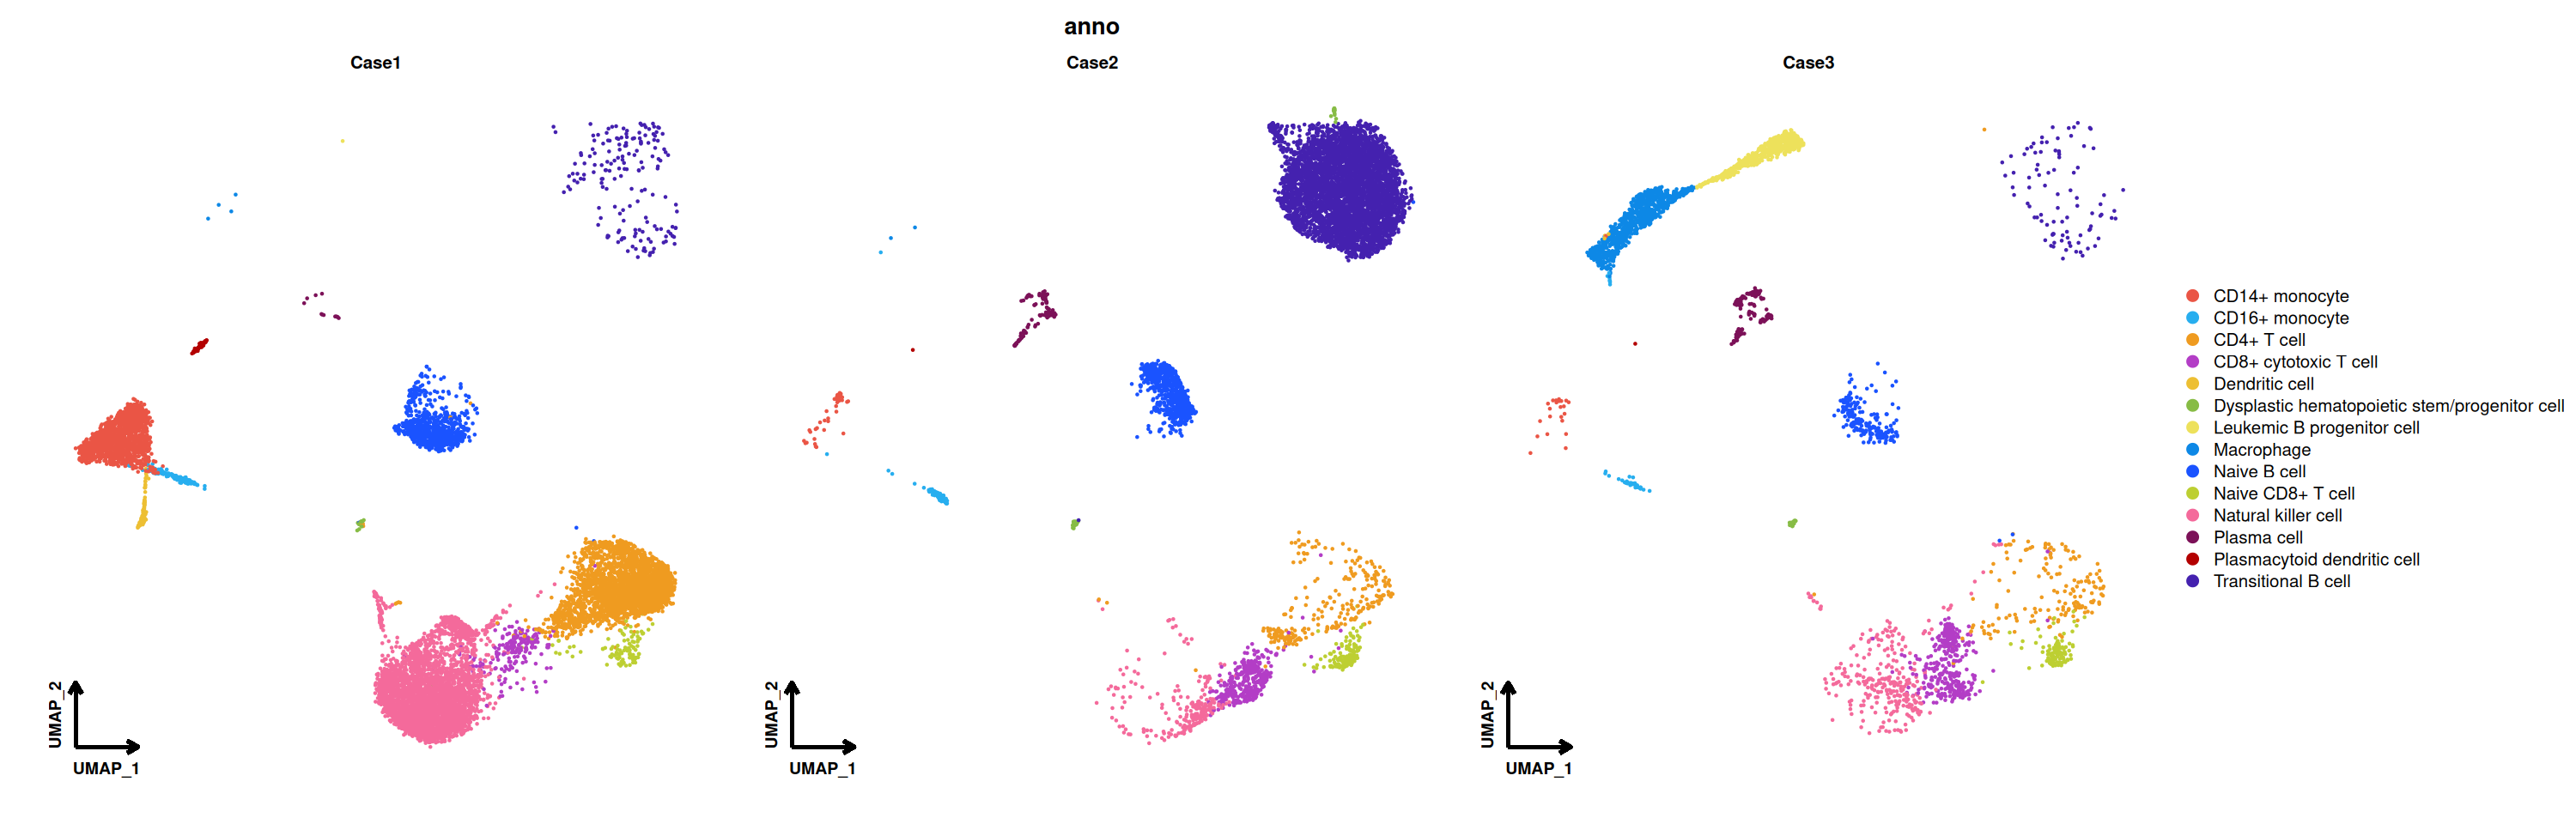

In [3]:
options(repr.plot.width=25, repr.plot.height=8)
ext_len1 <- (max(PBMC@reductions$umap@cell.embeddings[,1])-min(PBMC@reductions$umap@cell.embeddings[,1]))/10
ext_len2 <- (max(PBMC@reductions$umap@cell.embeddings[,2])-min(PBMC@reductions$umap@cell.embeddings[,2]))/10
DimPlot(PBMC,group.by = "anno",split.by = "HTO_classification",cols = color) +
  geom_segment(aes(x = min(PBMC@reductions$umap@cell.embeddings[,1]) , y = min(PBMC@reductions$umap@cell.embeddings[,2]) ,
                   xend = min(PBMC@reductions$umap@cell.embeddings[,1]) +ext_len1, yend = min(PBMC@reductions$umap@cell.embeddings[,2]) ),
               colour = "black", size=1,arrow = arrow(length = unit(0.3,"cm")))+ 
  geom_segment(aes(x = min(PBMC@reductions$umap@cell.embeddings[,1])  , y = min(PBMC@reductions$umap@cell.embeddings[,2])  ,
                   xend = min(PBMC@reductions$umap@cell.embeddings[,1]) , yend = min(PBMC@reductions$umap@cell.embeddings[,2]) + ext_len2),
               colour = "black", size=1,arrow = arrow(length = unit(0.3,"cm"))) +
  annotate("text", x = min(PBMC@reductions$umap@cell.embeddings[,1]) +ext_len1/2, y = min(PBMC@reductions$umap@cell.embeddings[,2]) -ext_len2/3, label = "UMAP_1",
           color="black",size = 4, fontface="bold" ) + 
  annotate("text", x = min(PBMC@reductions$umap@cell.embeddings[,1]) -ext_len1/3, y = min(PBMC@reductions$umap@cell.embeddings[,2]) + ext_len2/2, label = "UMAP_2",
           color="black",size = 4, fontface="bold" ,angle=90)+
  xlim(c(min(PBMC@reductions$umap@cell.embeddings[,1]) -ext_len1/3, max(PBMC@reductions$umap@cell.embeddings[,1])))+
  ylim(c(min(PBMC@reductions$umap@cell.embeddings[,2]) -ext_len2/3,max(PBMC@reductions$umap@cell.embeddings[,2]))) +  
  theme(axis.line = element_blank(),axis.ticks = element_blank(),axis.text = element_blank(),axis.title = element_blank()) 

ggsave(filename = "anno_umap.pdf",width = 25,height = 8,units = "in",dpi = 300)

# Figure 4B

In [4]:
library(Seurat)
library(ggplot2)
library(RColorBrewer)

In [5]:
PBMC <- readRDS("PBMC.Rds")
PBMC
head(PBMC@meta.data)

An object of class Seurat 
70716 features across 19455 samples within 2 assays 
Active assay: RNA (35358 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: orig.count
 3 dimensional reductions calculated: pca, tsne, umap

,orig.ident,nCount_RNA,nFeature_RNA,CellBarcodes,Cellnames,nCount_HTO,nFeature_HTO,nCount_pseudoHTO,nFeature_pseudoHTO,HTO_maxID,⋯,RNA_snn_res.1.8,RNA_snn_res.1.9,RNA_snn_res.2,decount_score,old_anno,anno,anno_new,totalCNV,nCount_orig.count,nFeature_orig.count
,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,⋯,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
CELL4_N1,lib17-chip3,2000,1054,AACAGACGACCCTCAGGTCG,CELL4_N1,36,2,39,3,Case1,⋯,17,17,18,0.06307971,Mature NK T cell,CD8+ cytotoxic T cell,Case1,704,2042,1062
CELL5_N1,lib17-chip3,1148,729,AACAGACGACCGCACAGGTA,CELL5_N1,12,2,15,3,Case1,⋯,0,3,0,0.09396679,NA,Natural killer cell,Case1,1050,1185,740
CELL7_N1,lib17-chip3,2045,1049,AACAGCATAGCCTGTTGCGC,CELL7_N1,40,2,43,3,Case1,⋯,4,5,2,0.03652518,CD14+ monocyte,CD14+ monocyte,Case1,848,2064,1054
CELL8_N1,lib17-chip3,4861,2196,AACCTAGTAGATATGTCTCA,CELL8_N1,33,2,36,3,Case2,⋯,7,7,8,0.02897729,Pro-B cell,Transitional B cell,Transitional B cell,956,4900,2205
CELL9_N1,lib17-chip3,1170,728,AACCTAGTAGCACAGAAGCC,CELL9_N1,26,3,29,3,Case1,⋯,0,3,0,0.05322462,Natural killer cell,Natural killer cell,Case1,1405,1186,735
CELL10_N1,lib17-chip3,14622,3908,AACCTGGTGAAACATTCCTC,CELL10_N1,40,3,43,3,Case3,⋯,28,28,29,0.07923297,Plasma cell,Plasma cell,Plasma cell,300,15381,3961


Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in brewer.pal(n = 100, name = "RdBu"):
“n too large, allowed maximum for palette RdBu is 11
Returning the palett

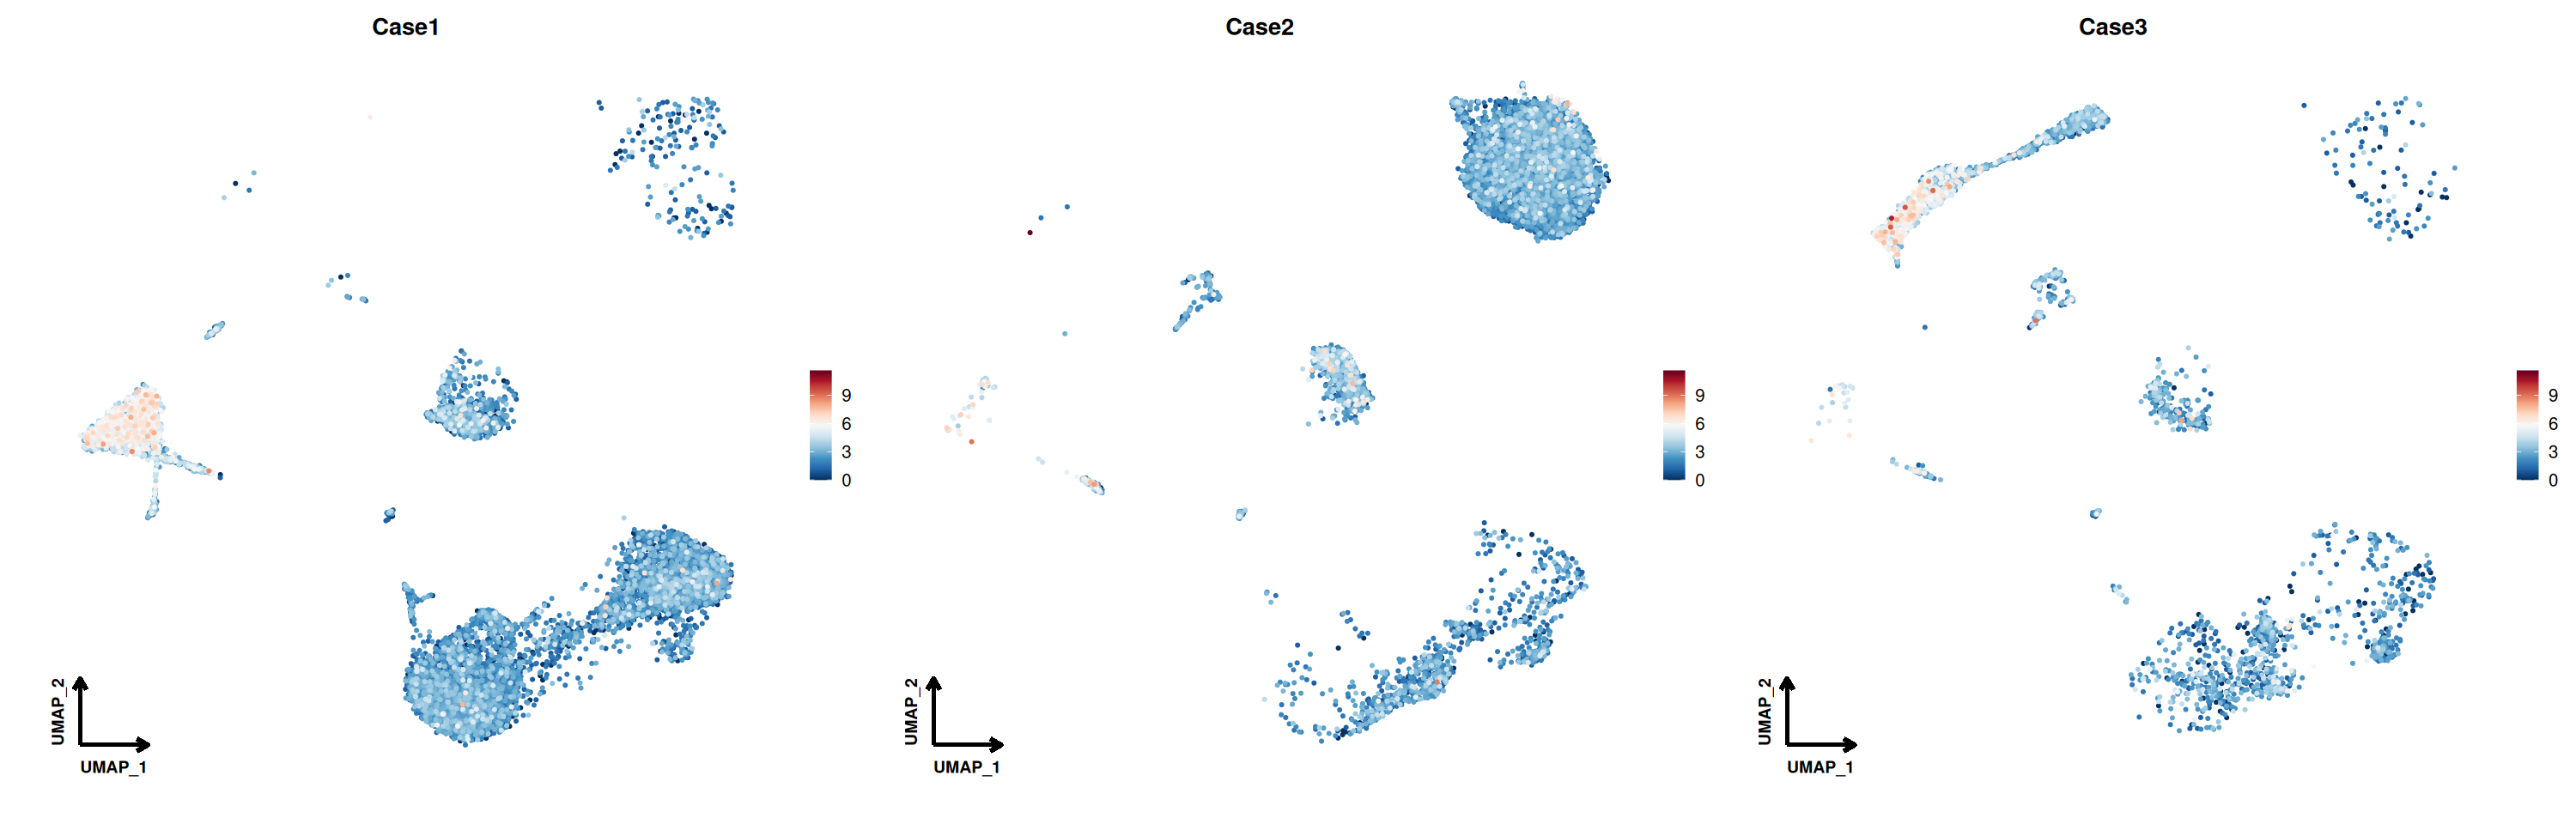

In [6]:
options(repr.plot.width=25, repr.plot.height=8)

ext_len1 <- (max(PBMC@reductions$umap@cell.embeddings[,1])-min(PBMC@reductions$umap@cell.embeddings[,1]))/10
ext_len2 <- (max(PBMC@reductions$umap@cell.embeddings[,2])-min(PBMC@reductions$umap@cell.embeddings[,2]))/10
FeaturePlot(PBMC,split.by="HTO_classification",features = "log2ANXV",order = T,pt.size = 0.5) & 
  theme(axis.line = element_blank(),axis.ticks = element_blank(),axis.text = element_blank(),axis.title = element_blank(),legend.position = "right")&
  geom_segment(aes(x = min(PBMC@reductions$umap@cell.embeddings[,1]) , y = min(PBMC@reductions$umap@cell.embeddings[,2]) ,
                   xend = min(PBMC@reductions$umap@cell.embeddings[,1]) +ext_len1, yend = min(PBMC@reductions$umap@cell.embeddings[,2]) ),
               colour = "black", size=1,arrow = arrow(length = unit(0.3,"cm"))) &
  geom_segment(aes(x = min(PBMC@reductions$umap@cell.embeddings[,1])  , y = min(PBMC@reductions$umap@cell.embeddings[,2])  ,
                   xend = min(PBMC@reductions$umap@cell.embeddings[,1]) , yend = min(PBMC@reductions$umap@cell.embeddings[,2]) + ext_len2),
               colour = "black", size=1,arrow = arrow(length = unit(0.3,"cm"))) &
  annotate("text", x = min(PBMC@reductions$umap@cell.embeddings[,1]) +ext_len1/2, y = min(PBMC@reductions$umap@cell.embeddings[,2]) -ext_len2/3, label = "UMAP_1",
           color="black",size = 4, fontface="bold" ) & 
  annotate("text", x = min(PBMC@reductions$umap@cell.embeddings[,1]) -ext_len1/3, y = min(PBMC@reductions$umap@cell.embeddings[,2]) + ext_len2/2, label = "UMAP_2",
           color="black",size = 4, fontface="bold" ,angle=90) &
  xlim(c(min(PBMC@reductions$umap@cell.embeddings[,1]) -ext_len1/3, max(PBMC@reductions$umap@cell.embeddings[,1]))) &
  ylim(c(min(PBMC@reductions$umap@cell.embeddings[,2]) -ext_len2/3,max(PBMC@reductions$umap@cell.embeddings[,2])))  &
  scale_colour_gradientn(colours = rev(brewer.pal(n = 100, name = "RdBu")),limits=c(0,max(PBMC$log2ANXV))) 

ggsave(filename = "log2ANXV_umap.pdf",width = 25,height = 8,units = "in",dpi = 300)

# Figure 4D

In [7]:
library(Seurat)
library(ggplot2)
library(ggplotify)
library(ComplexHeatmap)
library(circlize)

载入需要的程辑包：grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circu

In [8]:
PBMC <- readRDS("PBMC.Rds")
PBMC
head(PBMC@meta.data)

An object of class Seurat 
70716 features across 19455 samples within 2 assays 
Active assay: RNA (35358 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: orig.count
 3 dimensional reductions calculated: pca, tsne, umap

,orig.ident,nCount_RNA,nFeature_RNA,CellBarcodes,Cellnames,nCount_HTO,nFeature_HTO,nCount_pseudoHTO,nFeature_pseudoHTO,HTO_maxID,⋯,RNA_snn_res.1.8,RNA_snn_res.1.9,RNA_snn_res.2,decount_score,old_anno,anno,anno_new,totalCNV,nCount_orig.count,nFeature_orig.count
,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,⋯,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
CELL4_N1,lib17-chip3,2000,1054,AACAGACGACCCTCAGGTCG,CELL4_N1,36,2,39,3,Case1,⋯,17,17,18,0.06307971,Mature NK T cell,CD8+ cytotoxic T cell,Case1,704,2042,1062
CELL5_N1,lib17-chip3,1148,729,AACAGACGACCGCACAGGTA,CELL5_N1,12,2,15,3,Case1,⋯,0,3,0,0.09396679,NA,Natural killer cell,Case1,1050,1185,740
CELL7_N1,lib17-chip3,2045,1049,AACAGCATAGCCTGTTGCGC,CELL7_N1,40,2,43,3,Case1,⋯,4,5,2,0.03652518,CD14+ monocyte,CD14+ monocyte,Case1,848,2064,1054
CELL8_N1,lib17-chip3,4861,2196,AACCTAGTAGATATGTCTCA,CELL8_N1,33,2,36,3,Case2,⋯,7,7,8,0.02897729,Pro-B cell,Transitional B cell,Transitional B cell,956,4900,2205
CELL9_N1,lib17-chip3,1170,728,AACCTAGTAGCACAGAAGCC,CELL9_N1,26,3,29,3,Case1,⋯,0,3,0,0.05322462,Natural killer cell,Natural killer cell,Case1,1405,1186,735
CELL10_N1,lib17-chip3,14622,3908,AACCTGGTGAAACATTCCTC,CELL10_N1,40,3,43,3,Case3,⋯,28,28,29,0.07923297,Plasma cell,Plasma cell,Plasma cell,300,15381,3961


In [9]:
pval_list <- read.delim("GAM_list_macrophage_decontx_hvg.txt",header = T)
rownames(pval_list) <- make.unique(pval_list$gene)
head(pval_list)
color <- c("#ea5545", "#27aeef", "#ef9b20")

,p_val,gene,corr
,<dbl>,<chr>,<dbl>
CCL3,1.275038e-06,CCL3,0.29790977
CCL4,0.000000e+00,CCL4,0.32386602
CCL3L1,3.331658e-05,CCL3L1,0.29198673
IL1B,2.814527e-06,IL1B,0.35684264
SPP1,3.370350e-02,SPP1,-0.02728654
FCGR3A,2.607143e-04,FCGR3A,0.13056232


In [10]:
ma_df <- subset(PBMC,subset = anno == "Macrophage")
ma_df <- NormalizeData(ma_df)

Normalizing layer: counts



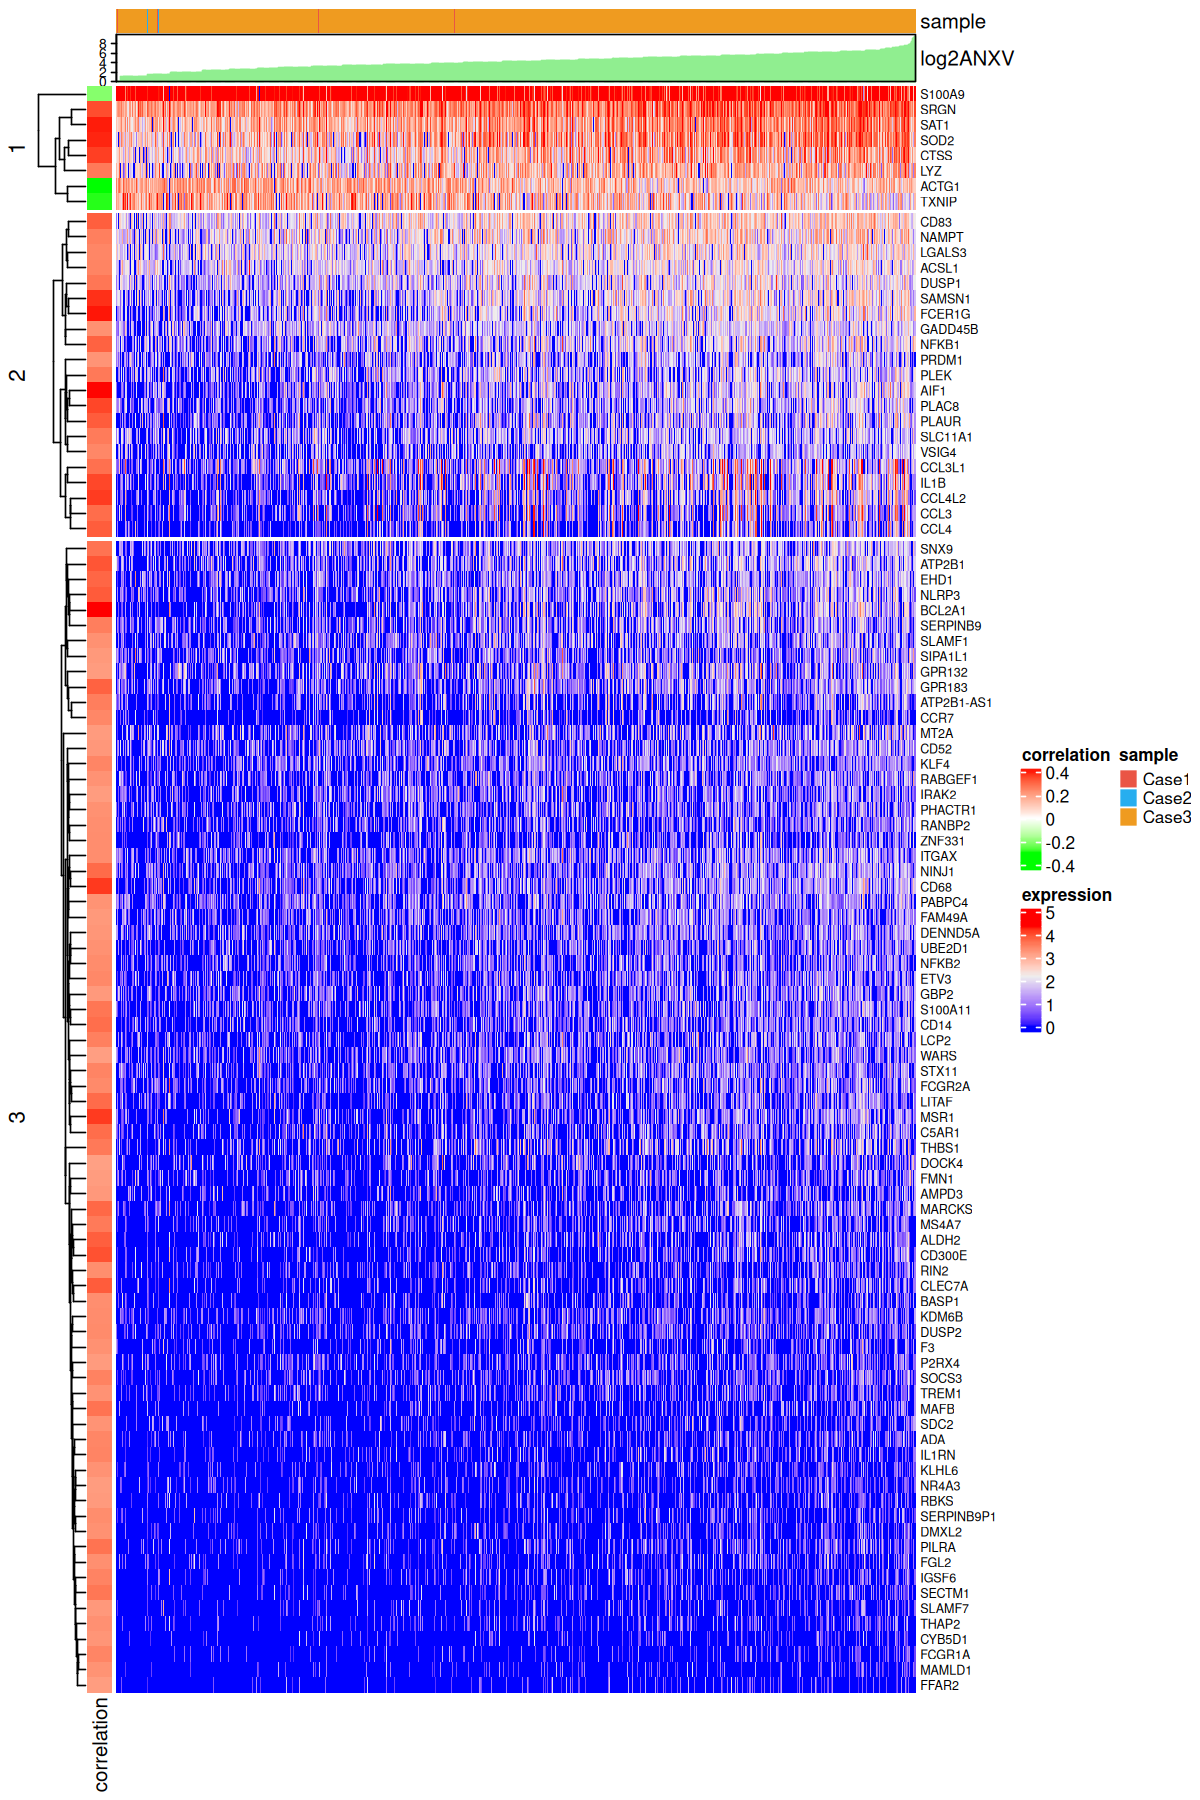

In [11]:
options(repr.plot.width=10, repr.plot.height=15)

pval_list$corr <- as.numeric(pval_list$corr)
pval_list2 <- pval_list[which(pval_list$p_val < 0.05 & abs(pval_list$corr)>0.2),]
data <- t(FetchData(ma_df,vars = rownames(pval_list2)))


anno_col <- FetchData(ma_df,vars ="HTO_classification")
anxv <- t(FetchData(ma_df,vars ="log2ANXV"))

cellcolor <- color
names(cellcolor) <- unique(anno_col$HTO_classification)[order(unique(anno_col$HTO_classification),decreasing = F)]



cluster <- hclust(dist(data),method = "ward.D2")
cluster_info <- cutree(cluster,3)
cluster_info[which(cluster_info == 1)] <- 4
cluster_info[which(cluster_info == 3)] <- 1
cluster_info[which(cluster_info == 2)] <- 3
cluster_info[which(cluster_info == 4)] <- 2

.hist = anno_barplot(anxv[1,],gp = gpar(fill = "lightgreen",col = "lightgreen"))


ha_mix_top = HeatmapAnnotation(sample=anno_col[,1],
  log2ANXV=.hist,
  col =list(sample= cellcolor))

ha_mix_left = HeatmapAnnotation(correlation=pval_list2$corr[which(pval_list2$gene %in% rownames(data))],which = "row",
                                col=list(correlation=colorRamp2(c(min(pval_list2$corr[which(pval_list2$gene %in% rownames(data))]), 
                                                                  0, max(pval_list2$corr[which(pval_list2$gene %in% rownames(data))])), c("green", "white", "red"))))


hc_clus=cluster_info
hc_clus=factor(hc_clus,levels = names(table(hc_clus)))

p <- Heatmap(data,split = hc_clus,
             cluster_row_slices = F,
             cluster_rows = T,
             show_row_dend = TRUE,
             column_order = order(anxv[1,],decreasing = F),
             left_annotation = ha_mix_left,
        top_annotation = ha_mix_top,show_column_names = F,heatmap_legend_param = list(title = "expression"),row_names_gp = gpar(cex=0.6))
p
p <- as.ggplot(p)
ggsave("macrophage_gam_heatmap_pval0.05_hvg2000_corr0.2.pdf",width = 10,height =15,units = "in",dpi = 300)